In [1]:
import pandas as pd
import pickle

In [2]:
%%time
may_scooters = pd.read_pickle('../data/may.pkl')
may_scooters.head()

Wall time: 2.09 s


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [3]:
may_scooters.info() ##20292503 rows, 9 columns, note pubdatetime is an object and needs to be changed to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.1+ GB


In [4]:
company_dict = {'Bird':'Bi', 'Lyft': 'Ly', 'Gotcha': 'G', 'Lime': 'Li', 'Spin': 'S', 'Jump': 'J', 'Bolt': 'Bo'}

In [5]:
may_scooters.companyname = may_scooters.companyname.replace(company_dict)##replaced company name with 2 letter name dictionary

In [6]:
may_scooters['year'] = may_scooters['pubdatetime'].dt.year

may_scooters['month'] = may_scooters['pubdatetime'].dt.month

may_scooters['day'] = may_scooters['pubdatetime'].dt.day

may_scooters['hour'] = may_scooters['pubdatetime'].dt.hour
may_scooters['min'] = may_scooters['pubdatetime'].dt.minute


In [7]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
 6   year         int64         
 7   month        int64         
 8   day          int64         
 9   hour         int64         
 10  min          int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 1.8+ GB


In [8]:
may_scooters = may_scooters[['pubdatetime', 'year', 'month', 'day', 'hour', 'sumdid', 'latitude', 'longitude', 'chargelevel', 'companyname']] ##drops columns costpermin from dataframe

In [9]:
pd.set_option('display.max_columns', 15)##sets dataframe to view 15 columns

In [10]:
may_scooters.dropna(inplace=True) ##dropping all null rows

In [11]:
may_scooters.tail(10)

,pubdatetime,year,month,day,hour,sumdid,latitude,longitude,chargelevel,companyname
20292493,2019-05-31 23:58:27.243,2019,5,31,23,PoweredHICJ5XYHBAW5I,36.122375,-86.775722,60.0,3
20292494,2019-05-31 23:58:27.243,2019,5,31,23,PoweredXZH7USFBU76DX,36.121613,-86.775351,94.0,3
20292495,2019-05-31 23:58:27.243,2019,5,31,23,PoweredSZAWEG5FWAI6V,36.120440,-86.777199,56.0,3
20292496,2019-05-31 23:58:27.243,2019,5,31,23,PoweredU6FP6ZXZ6JRTC,36.121584,-86.775493,94.0,3
20292497,2019-05-31 23:58:43.000,2019,5,31,23,Poweredf0c59838-3392-5ea9-9a8f-d680bc8ac344,36.147400,-86.811700,71.0,5
20292498,2019-05-31 23:59:42.000,2019,5,31,23,Poweredbb60ef04-c719-597f-805f-20978964fd8c,36.163900,-86.782300,49.0,5
20292499,2019-05-31 23:59:42.000,2019,5,31,23,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,36.160600,-86.776800,68.0,5
20292500,2019-05-31 23:59:42.000,2019,5,31,23,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,36.160600,-86.776900,53.0,5
20292501,2019-05-31 23:59:42.000,2019,5,31,23,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,36.162400,-86.774500,42.0,5
20292502,2019-05-31 23:59:42.000,2019,5,31,23,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,36.151900,-86.798500,76.0,5


In [12]:
may_scooters.info()
##Original info before drop of null rows, RangeIndex: 20292503 entries, 0 to 20292502, Data columns (total 9 columns):

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283299 entries, 0 to 20292502
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   year         int64         
 2   month        int64         
 3   day          int64         
 4   hour         int64         
 5   sumdid       object        
 6   latitude     float64       
 7   longitude    float64       
 8   chargelevel  float64       
 9   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 1.7+ GB


In [13]:
##may_scooters.to_pickle("../data/may.pkl")

In [14]:
##%%time
##may_test = pd.read_pickle("../data/may.pkl")

In [15]:
may_scooters.sumdid.unique()

array(['PoweredLIRL1', 'PoweredXWRWC', 'PoweredMEJEH', ...,
       'PoweredS26HB', 'PoweredWVFVTYLWIVLI7', 'Powered6Y1U7'],
      dtype=object)

In [16]:
may_scooters.sumdid.nunique() ##count the number of unique sumdid

8301

In [17]:
print(may_scooters['sumdid'].value_counts()) ##the count of each of the distinct values of a specific column
##https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
PoweredGJYGPDVTFXRH7       1
PoweredYEBSU               1
PoweredCW742BQMJ3XHN       1
PoweredCI6VKIK2KOFMC       1
PoweredN4YI2A7RXZQLY       1
Name: sumdid, Length: 8301, dtype: int64


In [18]:
##7 SCOOTER COMPANIES, 8304 SCOOTERS, 

In [19]:
may_group=may_scooters.groupby(['companyname'])['sumdid'].nunique() ##NUMBER OF UNIQUE SCOOTER GROUPED BY COMPANY NAME

In [20]:
may_group

companyname
0    3064
1    1376
2     223
3    1631
4     685
5     976
6     346
Name: sumdid, dtype: int64

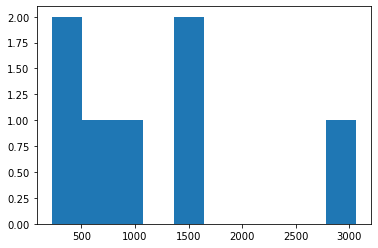

In [21]:
import matplotlib.pyplot as plt
plt.hist(may_group)##, label=companyname)
plt.show()

In [22]:
##import matplotlib.pyplot as plt
##import seaborn as sns
##%matplotlib inline      

In [23]:
#set the seaborn theme, style, color palette
#sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
#sns.pairplot(may_scooters);

In [24]:
duplicate_rows = may_scooters[may_scooters.duplicated()]
## Select duplicate rows except first occurrence based on all columns
##duplicateRowsDF = dfObj[dfObj.duplicated()]
##print("Duplicate Rows except first occurrence based on all columns are :")
##print(duplicateRowsDF)

In [25]:
print("Duplicate Rows except first occurrence based on all columns are:")

Duplicate Rows except first occurrence based on all columns are:


In [26]:
print(duplicate_rows)

Empty DataFrame
Columns: [pubdatetime, year, month, day, hour, sumdid, latitude, longitude, chargelevel, companyname]
Index: []


In [27]:
##https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

In [28]:
may_dead=may_scooters.loc[(may_scooters['chargelevel'] == 0.00)]

In [29]:
may_dead ##1025190 DEAD SCOOTERS/SCOOTERS WITH NO CHARGE/CHARGE LEVEL = 0

,pubdatetime,year,month,day,hour,sumdid,latitude,longitude,chargelevel,companyname
1077,2019-05-01 00:04:48.030,2019,5,1,0,Powered406,36.162910,-86.776332,0.0,2
1084,2019-05-01 00:04:48.030,2019,5,1,0,Powered785,36.152102,-86.762997,0.0,2
1093,2019-05-01 00:04:48.030,2019,5,1,0,Powered412,36.156370,-86.786350,0.0,2
1095,2019-05-01 00:04:48.030,2019,5,1,0,Powered826,36.121324,-86.770482,0.0,2
1096,2019-05-01 00:04:48.030,2019,5,1,0,Powered769,36.121522,-86.770209,0.0,2
...,...,...,...,...,...,...,...,...,...,...
20291457,2019-05-31 23:58:00.927,2019,5,31,23,Powered1572748,36.153768,-86.783705,0.0,4
20291578,2019-05-31 23:58:00.927,2019,5,31,23,Powered1590780,36.210910,-86.736240,0.0,4
20291808,2019-05-31 23:58:27.210,2019,5,31,23,PoweredUK65LOU3K5N7G,36.133764,-86.791866,0.0,3
20291887,2019-05-31 23:58:27.210,2019,5,31,23,PoweredKZQINR7YHPOLL,36.133778,-86.791849,0.0,3


In [30]:
may_dead_company = may_dead.value_counts(['companyname'])##NUMBER OF DEAD SCOOTERS BY COMPANY
may_dead_company 

companyname
5              769269
2              193698
4               39098
3               21465
6                1660
dtype: int64

In [31]:
may_dead=may_dead.value_counts(['companyname']).nunique() ##THE NUMBER OF COMPANIES WITH DEAD SCOOTERS
may_dead

5

In [ ]:
Powered406=may_dead.loc[(may_dead['sumdid']=='Powered406')]
Powered406

In [ ]:
# Select all duplicate rows based on multiple column names in list
duplicate_location = Powered406[Powered406.duplicated(['latitude', 'longitude'])]

In [ ]:
duplicate_location ##in Powered406 there are 868 rows. when looking at duplicate locations for Powered406 662 rows

In [ ]:
grouped_multiple=may_scooters.groupby(['latitude', 'longitude'])['sumdid'].nunique()

In [ ]:
grouped_multiple

In [ ]:
grouped_multiple.value_counts()

##may_scooters=grouped_multiple.dropna(['latitude', 'longitude']==0.000000)
##may_scooters